In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [5]:
def get_network_layer(G, layer=''):
    return G.subgraph([n for n, d in G.nodes(data=True) if (d.get('layer') == layer)]).copy()

In [2]:
celltype = 'spermatocyte'
network = 'thr'
threshold = 0.5
threshold_str = str(threshold).replace('.', 'p')
layer = species = 'DM'

In [3]:
file = '../../04-network/results/network/{celltype:s}/net-{celltype:s}-{network:s}-{threshold:s}.gpickle'.format(celltype=celltype, network=network, threshold=threshold_str)
G = nx.read_gpickle(file)

In [6]:
H = get_network_layer(G, layer='DM')

In [10]:
mdlc = 'FBgn0038772'
H.nodes[mdlc]

{'id_string': '7227.FBpp0083244',
 'label': 'mdlc',
 'TPM': 8.501652,
 'biotype': 'protein_coding',
 'logFPKM': 2.8294240948420417,
 'layer': 'DM'}

In [11]:
Hego = nx.ego_graph(H, mdlc)

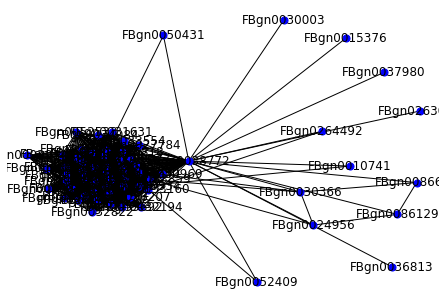

In [17]:
pos = nx.spring_layout(Hego)
nx.draw(Hego, pos, node_color="b", node_size=50, with_labels=True)

In [22]:
for i,j,d in G.edges(nbunch=['FBgn0038772'], data=True):
    if d['type'] == 'cross':
        print(i,j,d)

FBgn0038772 ENSG00000139797 {'type': 'cross'}
FBgn0038772 ENSMUSG00000098134 {'type': 'cross'}


In [30]:
G.nodes['ENSMUSG00000098134']

{'id_string': '10090.ENSMUSP00000138536',
 'label': 'Rnf113a2',
 'TPM': 89.66487633333332,
 'biotype': 'protein_coding',
 'logFPKM': 5.779374108699879,
 'layer': 'MM'}

ENSG00000139797 ENSMUSG00000098134 {'type': 'cross'}
ENSG00000139797 FBgn0038772 {'type': 'cross'}
